## ABSENTEEISM DATA ANALYSIS

Problem: Christmas season is fast approaching, and the business environment will be more competitive than any time of the year. This increases pressure in the workplace, therefore, it is reasonable to expect elevated stress and fatigue levels among staff. With this scenario, we would like to find out if an employee will be absent for several hours from rostered workday. This predetermined information can provide better insight on how work process can be organised to ensure productivity and quality of service. 

Objective: The analysis will explore whether employees are going to be excessively missing from work or not, based on the characteristics they present.

In [1]:
'''import the libraries'''
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#from sklearn import preprocessing
#from sklearn.preprocessing import LabelEncoder
#from sklearn.preprocessing import StandardScaler
%matplotlib inline

## INSPECT AND CLEANSE DATA

I. EXTRACT DATA FROM SOURCE AND SAVE AS DATAFRAME

In [2]:
train_data = pd.read_csv('absenteeism_data.csv')
test_data = pd.read_csv('absenteeism_new_data.csv')

II. INSPECT THE DATA

In [3]:
train_data.head(5)

,ID,Reason for Absence,Date,Transportation Expense,Distance to Work,Age,Daily Work Load Average,Body Mass Index,Education,Children,Pets,Absenteeism Time in Hours
0,11,26,07/07/2015,289,36,33,239.554,30,1,2,1,4
1,36,0,14/07/2015,118,13,50,239.554,31,1,1,0,0
2,3,23,15/07/2015,179,51,38,239.554,31,1,0,0,2
3,7,7,16/07/2015,279,5,39,239.554,24,1,2,0,4
4,11,23,23/07/2015,289,36,33,239.554,30,1,2,1,2


In [4]:
test_data.head(5)

,ID,Reason for Absence,Date,Transportation Expense,Distance to Work,Age,Daily Work Load Average,Body Mass Index,Education,Children,Pets
0,22,27,01/06/2018,179,26,30,237.656,19,3,0,0
1,10,7,04/06/2018,361,52,28,237.656,27,1,1,4
2,14,23,06/06/2018,155,12,34,237.656,25,1,2,0
3,17,25,08/06/2018,179,22,40,237.656,22,2,2,0
4,14,10,08/06/2018,155,12,34,237.656,25,1,2,0


In [5]:
target_data = train_data[['Absenteeism Time in Hours']]

In [6]:
target_data.head(5)

,Absenteeism Time in Hours
0,4
1,0
2,2
3,4
4,2


III. DETERMINE THE VARIABLES, DATA TYPES, AND DATA VOLUME

In [7]:
train_data.info(verbose=True, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700 entries, 0 to 699
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   ID                         700 non-null    int64  
 1   Reason for Absence         700 non-null    int64  
 2   Date                       700 non-null    object 
 3   Transportation Expense     700 non-null    int64  
 4   Distance to Work           700 non-null    int64  
 5   Age                        700 non-null    int64  
 6   Daily Work Load Average    700 non-null    float64
 7   Body Mass Index            700 non-null    int64  
 8   Education                  700 non-null    int64  
 9   Children                   700 non-null    int64  
 10  Pets                       700 non-null    int64  
 11  Absenteeism Time in Hours  700 non-null    int64  
dtypes: float64(1), int64(10), object(1)
memory usage: 65.8+ KB


In [8]:
target_data.info(verbose=True, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700 entries, 0 to 699
Data columns (total 1 columns):
 #   Column                     Non-Null Count  Dtype
---  ------                     --------------  -----
 0   Absenteeism Time in Hours  700 non-null    int64
dtypes: int64(1)
memory usage: 5.6 KB


In [9]:
test_data.info(verbose=True, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40 entries, 0 to 39
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       40 non-null     int64  
 1   Reason for Absence       40 non-null     int64  
 2   Date                     40 non-null     object 
 3   Transportation Expense   40 non-null     int64  
 4   Distance to Work         40 non-null     int64  
 5   Age                      40 non-null     int64  
 6   Daily Work Load Average  40 non-null     float64
 7   Body Mass Index          40 non-null     int64  
 8   Education                40 non-null     int64  
 9   Children                 40 non-null     int64  
 10  Pets                     40 non-null     int64  
dtypes: float64(1), int64(9), object(1)
memory usage: 3.6+ KB


IV: CLEANSE DATA FROM NULLS & DUPLICATES

In [10]:
train_data.isnull().sum()

ID                           0
Reason for Absence           0
Date                         0
Transportation Expense       0
Distance to Work             0
Age                          0
Daily Work Load Average      0
Body Mass Index              0
Education                    0
Children                     0
Pets                         0
Absenteeism Time in Hours    0
dtype: int64

In [11]:
train_data.isnull().sum()

ID                           0
Reason for Absence           0
Date                         0
Transportation Expense       0
Distance to Work             0
Age                          0
Daily Work Load Average      0
Body Mass Index              0
Education                    0
Children                     0
Pets                         0
Absenteeism Time in Hours    0
dtype: int64

In [12]:
test_data.isnull().sum()

ID                         0
Reason for Absence         0
Date                       0
Transportation Expense     0
Distance to Work           0
Age                        0
Daily Work Load Average    0
Body Mass Index            0
Education                  0
Children                   0
Pets                       0
dtype: int64

In [13]:
train_data.duplicated().sum()

8

There are 8 duplicated rows. Extract and evaluate the rows.

In [14]:
train_data[train_data.duplicated()]

,ID,Reason for Absence,Date,Transportation Expense,Distance to Work,Age,Daily Work Load Average,Body Mass Index,Education,Children,Pets,Absenteeism Time in Hours
127,34,27,11/01/2016,118,10,37,308.593,28,1,0,0,2
128,34,27,12/01/2016,118,10,37,308.593,28,1,0,0,2
131,34,27,13/01/2016,118,10,37,308.593,28,1,0,0,2
305,5,23,19/10/2016,235,20,43,265.017,38,1,1,0,2
388,3,27,22/02/2017,179,51,38,251.818,31,1,0,0,3
389,3,27,24/02/2017,179,51,38,251.818,31,1,0,0,3
477,24,28,25/07/2017,246,25,41,230.290,23,1,0,0,2
496,24,28,05/09/2017,246,25,41,261.756,23,1,0,0,1


All rows have different dates of recorded absences and are therefore, are considered unique. 

In [15]:
target_data.duplicated().sum()

681

In [16]:
target_data[target_data.duplicated()]

,Absenteeism Time in Hours
3,4
4,2
5,2
7,4
9,8
...,...
695,8
696,3
697,8
698,2


In [17]:
target_data[target_data['Absenteeism Time in Hours']<=0].head()

,Absenteeism Time in Hours
1,0
50,0
51,0
54,0
55,0


The target table contains "Absenteeism Time in Hours" column. There are 681 duplicated rows, and 39 rows where "Absenteeism Time in Hours" are equal to 0. Since employees can be away from work for the same period, these duplicates are valid. For the rows where the hours are equal to 0, further analysis about the nature of absence is needed.

In [18]:
test_data.duplicated().sum()

0

V. EXPLORATORY DATA ANALYSIS

Descriptive Analysis

In [19]:
train_data.describe()

,ID,Reason for Absence,Transportation Expense,Distance to Work,Age,Daily Work Load Average,Body Mass Index,Education,Children,Pets,Absenteeism Time in Hours
count,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000
mean,17.951429,19.411429,222.347143,29.892857,36.417143,271.801774,26.737143,1.282857,1.021429,0.687143,6.761429
std,11.028144,8.356292,66.312960,14.804446,6.379083,40.021804,4.254701,0.668090,1.112215,1.166095,12.670082
min,1.000000,0.000000,118.000000,5.000000,27.000000,205.917000,19.000000,1.000000,0.000000,0.000000,0.000000
25%,9.000000,13.000000,179.000000,16.000000,31.000000,241.476000,24.000000,1.000000,0.000000,0.000000,2.000000
50%,18.000000,23.000000,225.000000,26.000000,37.000000,264.249000,25.000000,1.000000,1.000000,0.000000,3.000000
75%,28.000000,27.000000,260.000000,50.000000,40.000000,294.217000,31.000000,1.000000,2.000000,1.000000,8.000000
max,36.000000,28.000000,388.000000,52.000000,58.000000,378.884000,38.000000,4.000000,4.000000,8.000000,120.000000


The table above provides an insight of the work required for predicting excessive absenteeism. Exploring the descriptive statistics shows that all columns have numeric data. Excluding ID and “Absenteeism Time in Hours,” all columns will be referred to as the features that will be used as predictors for absenteeism. For column ID, it serves as a unique identifier for each row, but will not be useful as a predictor and will therefore, not be included in the process of predictive analysis. “Absenteeism Time in Hours” on the other hand, will be the target column which will be the basis for determining excessive absenteeism. 

EXAMINE THE TARGET VARIABLE: "Absenteeism Time in Hours"

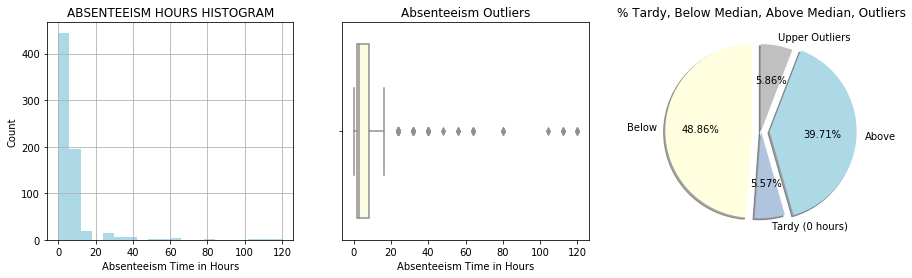

In [20]:
# Set up the matplotlib figure
f, axes = plt.subplots(ncols=3, figsize=(15, 4))
df = train_data.copy()
above_median = df[df['Absenteeism Time in Hours']>df['Absenteeism Time in Hours'].median()]

# Graph the "Absenteeism Time in Hours" distribution
df['Absenteeism Time in Hours'].hist(color='lightblue', bins=20, ax=axes[0])
axes[0].set_title("ABSENTEEISM HOURS HISTOGRAM")
axes[0].set_xlabel('Absenteeism Time in Hours')
axes[0].set_ylabel('Count')

# Graph salary outliers 
sns.boxplot(df['Absenteeism Time in Hours'], color='lightyellow', ax=axes[1]).set_title('Absenteeism Outliers')

# Graph pie chart 
tasks = [342, 39, 278, 41]
pi_labels = 'Below','Tardy (0 hours)','Above','Upper Outliers'
pi_colors = ['lightyellow','lightsteelblue','lightblue','silver']
pi_explode = (0.1,0,0.1,0)
axes[2].set_title('% Tardy, Below Median, Above Median, Outliers')
axes[2].pie(tasks, labels=pi_labels, autopct='%1.2f%%', startangle=90, shadow = True, colors=pi_colors, explode=pi_explode)
tight=True

In [21]:
hours_statistics = df['Absenteeism Time in Hours'].describe() 
IQR = hours_statistics['75%']-hours_statistics['25%'] 
upper_limit = hours_statistics['75%']+1.5*IQR
lower_limit = hours_statistics['25%']-1.5*IQR
print('IQR:',IQR)
print('upper_limt:',upper_limit)
print('lower_limit:',lower_limit)

IQR: 6.0
upper_limt: 17.0
lower_limit: -7.0


TARGET VARIABLE DESCRIPTIVE STATISTICS, ZERO HOURS and OUTLIERS

In [22]:
df['Absenteeism Time in Hours'].describe()

count    700.000000
mean       6.761429
std       12.670082
min        0.000000
25%        2.000000
50%        3.000000
75%        8.000000
max      120.000000
Name: Absenteeism Time in Hours, dtype: float64

UPPER OUTLIERS

In [23]:
df[df['Absenteeism Time in Hours']>=17].head(5)

,ID,Reason for Absence,Date,Transportation Expense,Distance to Work,Age,Daily Work Load Average,Body Mass Index,Education,Children,Pets,Absenteeism Time in Hours
8,14,19,06/07/2015,155,12,34,239.554,25,1,2,0,40
22,10,13,10/08/2015,361,52,28,205.917,27,1,1,4,40
49,15,14,14/09/2015,291,31,40,241.476,25,1,1,1,32
85,14,10,02/11/2015,155,12,34,306.345,25,1,2,0,32
87,15,14,16/11/2015,291,31,40,306.345,25,1,1,1,40


ZERO ABSENTEEISM TIME IN HOURS  (Tardiness less than 30 minutes)

In [24]:
df[df['Absenteeism Time in Hours']==0].head(5)

,ID,Reason for Absence,Date,Transportation Expense,Distance to Work,Age,Daily Work Load Average,Body Mass Index,Education,Children,Pets,Absenteeism Time in Hours
1,36,0,14/07/2015,118,13,50,239.554,31,1,1,0,0
50,20,0,21/09/2015,260,50,36,241.476,23,1,4,0,0
51,29,0,28/09/2015,225,26,28,241.476,24,1,1,2,0
54,11,0,22/09/2015,289,36,33,241.476,30,1,2,1,0
55,36,0,29/09/2015,118,13,50,241.476,31,1,1,0,0


The histogram above shows the number of hours of absence, and the number of employees who are absent. The graph is heavily skewed to the right due to outliers. The boxplot in the 2nd graph and at the descriptive statistics table above furhter explain the outliers.The leftmost vertical line in the boxplot indicates the lower outlier limit (equal to -7) and the rightmost vertical is the upper limit line (equal to 17). In between is the box where the 25th%ile, 50th%ile and 75th%ile lines are shown from left to right, respectively. The 50th%ile will be the cut-off value to determine the excessive and non-excessive absenteeism hours. Explained graphically on the pie chart, using the median as the cut-off value provides a good balance between excessive absenteeism (44% including the upper outliers), and non-excessive absenteeism (56% including the "tardy" rows).

Looking into the upper outleirs table above, the outliers are valid data. They describe scenarios in the workplace where employees miss work for long periods. Considering natural variations in data, these outliers will not be deleted.   

Finally, the "Zero absenteeism time in hours" table, shows the rows where employees have been away from work for less than 30 mins. Since “Absenteeism Time in Hours” is an integer type, float values like 0.25 (hours) will rounded off to 0. These rows are considered valid data and will not be dropped from the data.

DATA TRANSFORMATION 

In data analysis, it is more convenient to analyse variables with wide range of values in terms of groups. The variables to group are: “Reason for Absence”, “Age”, “Body Mass Index”, “Distance to Work”

In [25]:
# This class creates the train_df and test_df for analysis and modelling 
class DataPrep:
       
    # This method initialises the class variables
    def __init__(self, data_file, test_file, features, target1):
        self.features = list(features)
        self.target1 = target1
        self.target2 = target2
        self.xfeatures = list(xfeatures)
        self.xtarget_data = self.create_xtarget_data() 
        self.xtrain_data = self.create_xtrain_data()
        self.xtest_data = self.create_xtest_data()      
    
    # This method creates the transformed train_data
    def create_xtrain_data(self, fillna=True):
        xdf = self.read_file(data_file)
        xdf = self.xform_cat(xdf)
        xdf = self.split_date(xdf)
        xdf = self.reorder_columns(xdf)
        if fillna:
            xtrain_data = pd.concat([xdf, self.xtarget_data],axis=1)
            xtrain_data.fillna(0, inplace=True)
        return xtrain_data
    
    # This method creates the transformed test_data
    def create_xtest_data(self, fillna=True):
        xdf = self.read_file(test_file)
        xdf = self.xform_cat(xdf)
        xdf = self.split_date(xdf)
        if fillna:
            xtest_data = self.reorder_columns(xdf)
            xtest_data.fillna(0, inplace=True)
        return xtest_data
 
    # The features can be grouped according to "personal" and "work" related context. Personal context are the  
    # characteristics of an employee including: "Reason for Absence", "Month", "Day", “Year”, "Age", "Body Mass Index", 
    # "Education", "Children", "Pets" and “Distance to Work”. 
    # Work context on the other hand, includes “Transportation Expense", and "Daily Work Load Average". 
    # The df columns can be re-arranged based on this context
    def reorder_columns(self, df):
        df = df[['ID','Reason for Absence', 'Reason1','Reason2','Reason3','Reason4','Day', 'Month', 'Year', 'Age', 
                 'Body Mass Index', 'Education', 'Children', 'Pets', 'Distance to Work', 'Transportation Expense', 
                 'Daily Work Load Average']] #,'Absenteeism Time in Hours','Target']]
        return df
    
    # ADD A TARGET COLUMN TO CONTAIN THE ODDS VALUES (0 for non-excessive and 1 for excessive absenteeism)
    # and create a target df containing "absenteeism time in hours" and "target" columns
    def create_xtarget_data(self):
        df['Target']= np.where(df['Absenteeism Time in Hours']>3,1,0)
        xtarget_data = df[['Absenteeism Time in Hours', 'Target']]
        return xtarget_data 
    
    # This method extracts day, month from Date column and drops the Date colm after  
    # to avoid multicolinearity between day, month, year and date columns
    def split_date(self, df):
        df['Day'] = pd.DatetimeIndex(df['Date']).day
        df['Month'] = pd.DatetimeIndex(df['Date']).month
        df['Year'] = pd.DatetimeIndex(df['Date']).year
        df = df.drop(['Date'], axis=1)
        df['Year'] = df['Year'].map({2015:1 ,2016:2, 2017:3, 2018:4})
        return df
           
    # In data analysis, it is more convenient to analyse variables with wide range of values in terms of groups. 
    # The variables to group are: “Reason for Absence”, “Age”, “Body Mass Index”, “Distance to Work” 
    def xform_cat(self, df):
        
        # dummies to be used in data modelling 
        reason_dummies = pd.get_dummies(df['Reason for Absence'], drop_first=True)
        reason1 = reason_dummies.loc[:,1:14].max(axis=1)
        reason2 = reason_dummies.loc[:,15:17].max(axis=1)
        reason3 = reason_dummies.loc[:,18:21].max(axis=1)
        reason4 = reason_dummies.loc[:,22:].max(axis=1)
        df = pd.concat([df, reason1, reason2, reason3, reason4], axis=1)
        df.rename(columns={0:'Reason1', 1:'Reason2', 2:'Reason3', 3:'Reason4'}, inplace=True)        
        
        # mapping for use in data analysis
        # Legend: 
        # 1: Reasons 0 to 14
        # 2: Reasons 15 to 17
        # 3: Reasons 18 to 21
        # 4: Reasons 22 to 28
        df['Reason for Absence'] = [1 if x<=14 else x for x in df['Reason for Absence']]
        df['Reason for Absence'] = [2 if 14<x<18 else x for x in df['Reason for Absence']]
        df['Reason for Absence'] = [3 if 17<x<22 else x for x in df['Reason for Absence']]
        df['Reason for Absence'] = [4 if x>21 else x for x in df['Reason for Absence']]
    
        # mapping for use in data analysis and 
        # Legend: 
        # 1: Ages from 27 to 29
        # 2: Ages from 30 to 34
        # 3: Ages from 35 to 39
        # 4: Ages from 40 to 44
        # 5: Ages from 45 to 49
        # 6: Ages from 50 to 60
        df['Age'] = [1 if x<30 else x for x in df['Age']]
        df['Age'] = [2 if 29<x<35 else x for x in df['Age']]
        df['Age'] = [3 if 34<x<40 else x for x in df['Age']]
        df['Age'] = [4 if 39<x<45 else x for x in df['Age']]
        df['Age'] = [5 if 44<x<50 else x for x in df['Age']]
        df['Age'] = [6 if 49<x<60 else x for x in df['Age']]
        #df['Age'] = [7 if x>54 else x for x in df['Age']]
    
        # mapping for use in data analysis and data modelling 
        # Legend: 
        # 1: BMI range: 18 and below 
        # 2: BMI range: 19 to 24 
        # 3: BMI range: 25 to 29
        # 4: BMI range: 30 and above        
        df['Body Mass Index'] = [1 if x<18 else x for x in df['Body Mass Index']]
        df['Body Mass Index'] = [2 if 18<x<25 else x for x in df['Body Mass Index']]
        df['Body Mass Index'] = [3 if 24<x<30 else x for x in df['Body Mass Index']]
        df['Body Mass Index'] = [4 if x>29 else x for x in df['Body Mass Index']]
    
        # mapping for use in data analysis and data modelling 
        # Legend: 
        # 1: Distance range: 0 to 10 kms or miles
        # 2: Distance range: 11 to 20 kms or miles
        # 3: Distance range: 21 to 30 kms or miles
        # 4: Distance range: 31 to 40 kms or miles
        # 5: Distance range: 41 to 50 kms or miles
        # 6: Distance range: 51 to 60 kms or miles
        df['Distance to Work'] = [1 if 0<x<11 else x for x in df['Distance to Work']]
        df['Distance to Work'] = [2 if 10<x<21 else x for x in df['Distance to Work']]
        df['Distance to Work'] = [3 if 20<x<31 else x for x in df['Distance to Work']]
        df['Distance to Work'] = [4 if 30<x<41 else x for x in df['Distance to Work']]
        df['Distance to Work'] = [5 if 40<x<51 else x for x in df['Distance to Work']]
        df['Distance to Work'] = [6 if 50<x<61 else x for x in df['Distance to Work']]
        return df
    
    # This method reads the give dataset (given is .csv) and save file as dataframe, df
    def read_file(self, file):
        df = pd.read_csv(file)
        return df 
    
if __name__ == '__main__':
    
    data_file = 'absenteeism_data.csv'
    test_file = 'absenteeism_new_data.csv'
    features = ['Reason for Absence', 'Day', 'Month', 'Year', 'Age', 'Body Mass Index',
                'Education', 'Children', 'Pets', 'Distance to Work', 'Transportation Expense', 'Daily Work Load Average'] 
    xfeatures = ['Reason1','Reason2','Reason3','Reason4','Day', 'Month', 'Year', 'Age', 
                 'Body Mass Index', 'Education', 'Children', 'Pets', 'Distance to Work', 'Transportation Expense', 
                 'Daily Work Load Average']
    id_colm = 'ID'
    target1 = 'Absenteeism Time in Hours'
    target2 = 'Target'
    
    dp = DataPrep(data_file, test_file, features, target1)

EXPLORATORY DAT ANALYSIS OF OTHER FEATURES

CORREALTION HEATMAP

The map below shows that employees are most likely to be missing from work due to Reason1, Reason3, and Reason4. They show the highest correlations with "absenteism Time in Hours." 

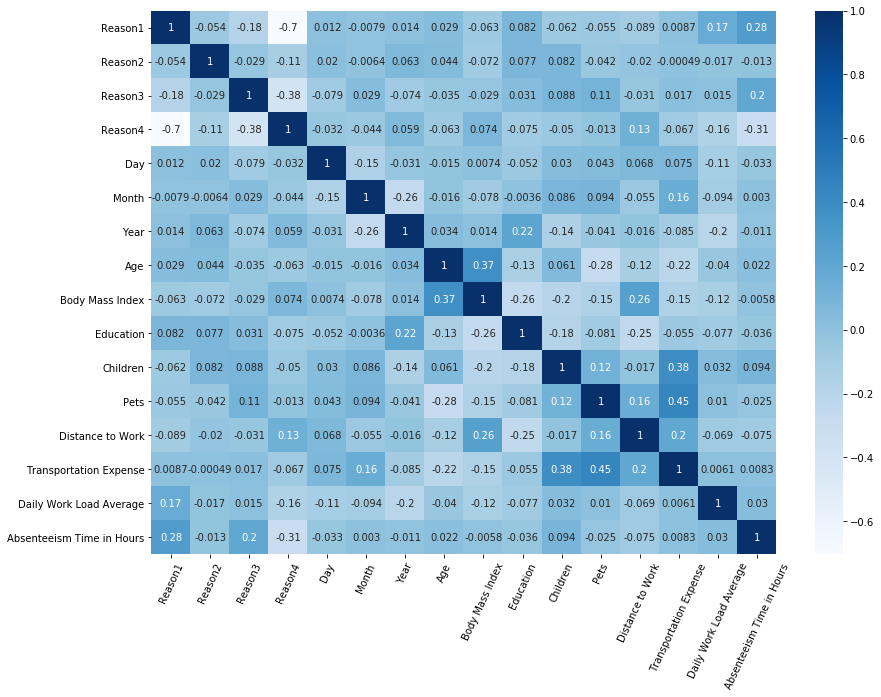

In [26]:
fig = plt.figure(figsize=(14, 10)) 
sns.heatmap(dp.xtrain_data[dp.xfeatures + [dp.target1]].corr(), cmap='Blues', annot=True) 
plt.xticks(rotation=65)
plt.show() 

DATA ANALYSIS ON FEATURES AND "ABSENTEEISM TIME IN HOURS"

In [27]:
# plot the graphs
def plot(cat, df, target_var1, target_var2, time, row_size, colm_size ):
    fig, ax = plt.subplots(ncols=2, figsize=(row_size, colm_size))
    df_t0 = df.query("Target == 0")
    df_t1 = df.query("Target == 1")
    
    dfc_t0 = df_t0.groupby([time, cat]).count()[target_var2].unstack()   
    dfc_t1 = df_t1.groupby([time, cat]).count()[target_var2].unstack()
    dfc_t01 = df.groupby([time])[target_var1].count()
    sns.lineplot(data=dfc_t01, color='gray', ax=ax[0] )
    sns.lineplot(data=dfc_t0, ax=ax[0])
    sns.lineplot(data=dfc_t1, markers=True, ax=ax[0])
    ax[0].set_title(time + ' Count: Total, Excessive & Non-Excessive Absenteeism')
    ax[0].set_xlabel(time)
    ax[0].set_ylabel('count')
    
    dfs_t0 = df_t0.groupby([time, cat]).sum()[target_var1].unstack()   
    dfs_t1 = df_t1.groupby([time, cat]).sum()[target_var1].unstack()
    dfs_t01 = df.groupby([time])[target_var1].sum()
    sns.lineplot(data=dfs_t01, color ='gray', ax=ax[1])
    sns.lineplot(data=dfs_t0, ax=ax[1])
    sns.lineplot(data=dfs_t1, markers=True, ax=ax[1])
    ax[1].set_title(time + ' Sum Hours: Total, Excessive & Non-Excessive Absenteeism')
    ax[1].set_xlabel(time)
    ax[1].set_ylabel('hours')    

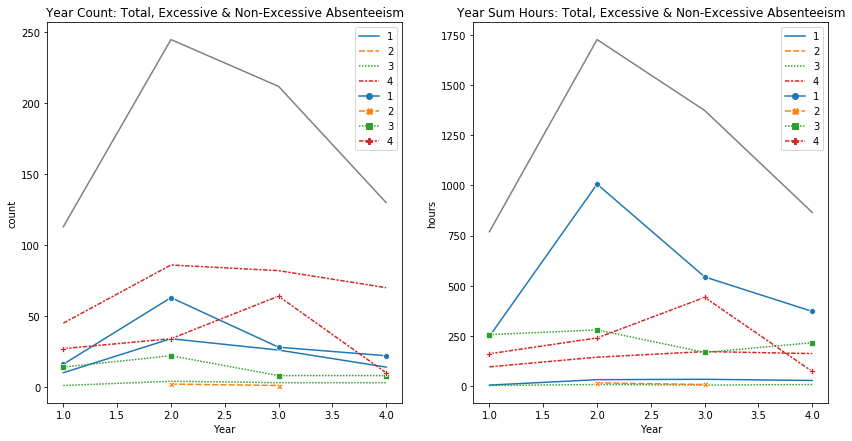

In [28]:
xdf = dp.xtrain_data.copy()
# Legend: Reasons (colored lines)
        # 1: Reasons 0 to 14
        # 2: Reasons 15 to 17
        # 3: Reasons 18 to 21
        # 4: Reasons 22 to 28
# Legend: Year (1: 2015, 2:2016, 3:2017, 4:2018)        
plot('Reason for Absence', xdf, 'Absenteeism Time in Hours', 'Target', 'Year', 14, 7)

Feature Name: "Reason for Absence"

The 1st and 2nd line graphs above show the ANNUAL count and sum of hours for absences respectively. The marked lines also show the trend for excessive absences, and the unmarked lines show the non-excessive absences. The coloured lines further present the trend for reasons for absences. 

Consequently, the graphs show that the reason with the highest count is not necessarily the reason with the highest sum of hours. From the first graph, it is apparent that most employees are absent due to Reason4 and are not missing excessively. On the 2nd graph however, these employees spend a smaller number of hours away from work than the employees who were excessively absent due to Reason1, Reason3 and Reason4. Lastly on the 2nd graph, the highest sum of hours of absences is due to Reason1, with employees missing work excessively. Overall, the highest rate of absences transpired on the 2nd year, in 2016, and the rate of absenteeism has since decreased.       

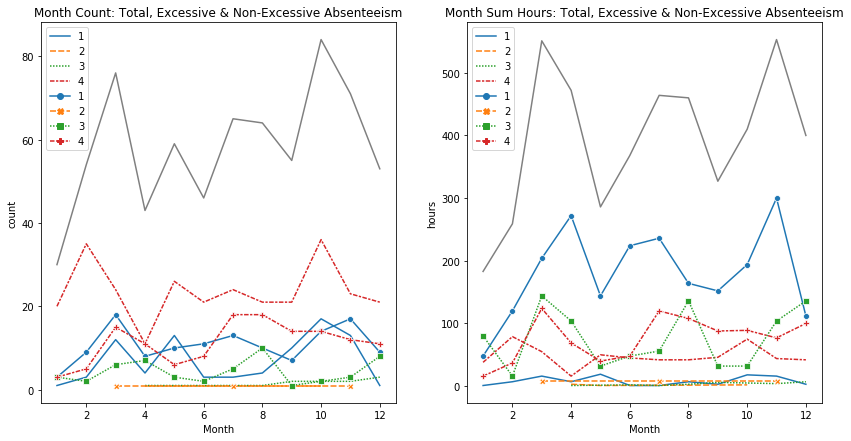

In [29]:
plot('Reason for Absence', xdf, 'Absenteeism Time in Hours', 'Target', 'Month', 14, 7)

Feature Name: "Reason for Absence"

The 1st and 2nd line graphs above show the MONTHLY count and sum of hours for absences respectively. The marked lines show the trend for excessive absences, and the unmarked lines show the non-excessive absences. The coloured lines further present the trend for reasons for absences.

The graphs show that on a MONTHLY basis, the reason with the highest count is not necessarily the reason with the highest sum of hours. From the first graph, it is apparent that most employees are absent on the 2nd and 10th months due to Reason4 but are not missing excessively. On the 2nd graph, the highest sum of hours of absences is due to Reason1, with employees missing work excessively on the 4th and 11th months.

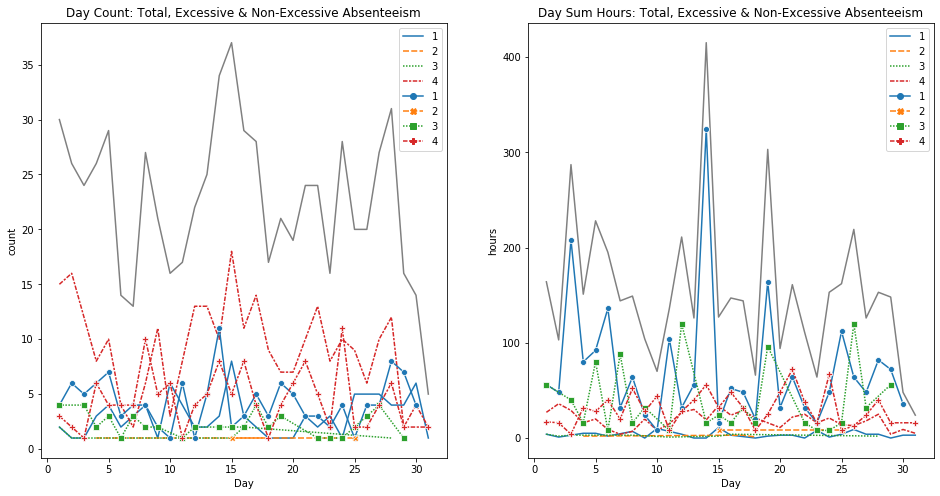

In [30]:
plot('Reason for Absence', xdf, 'Absenteeism Time in Hours', 'Target', 'Day', 16, 8)

Feature Name: "Reason for Absence"

The 1st and 2nd line graphs above show the DAILY count and sum of hours for absences respectively. The marked lines show the trend for excessive absences, and the unmarked lines show the non-excessive absences. The coloured lines further present the trend for reasons for absences.

From both graphs, it is apparent that the highest rate of absence occurs on the 15th day of the month. The graphs, however, show that the reason with the highest count is not necessarily the reason with the highest sum of hours. From the first graph, most employees are absent due to REASON4 however, not excessively. On the 2nd graph, the highest sum of hours of absences is due to Reason1, with employees missing work excessively.

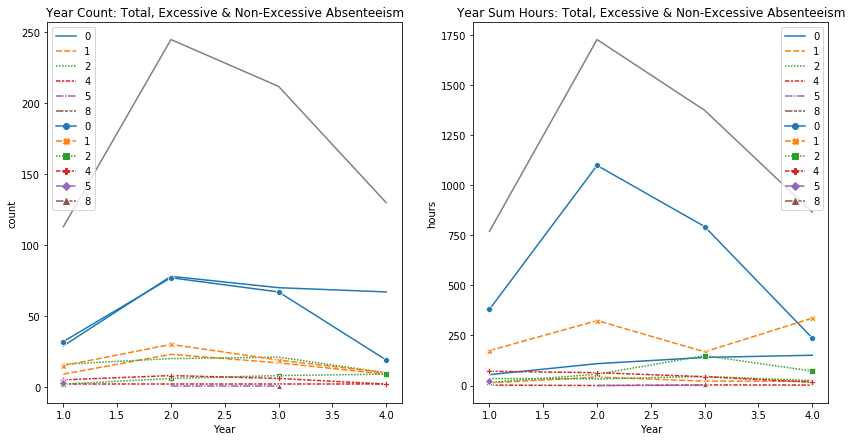

In [31]:
# FEATURE NAME: PETS
# Legend: Year (1: 2015, 2:2016, 3:2017, 4:2018)        
plot('Pets', xdf, 'Absenteeism Time in Hours', 'Target', 'Year', 14, 7)

The graphs show the ANNUAL absences due to "PETS" in terms of COUNT and SUM OF HOURS, respectively. The marked lines show the excessive absences, and the unmarked lines refer to the non-excessive absences. The coloured lines also show the trend based on number of pets from 0 to 8. 

Overall, employees with 0 or no pets have higher rate of absenteeism that those who have pets, and employees who are absent because of no pets tend to be excessively absent. Based on the correlation graph presented earlier, there is a negative correlation between number of "pets" and "absenteeism time in hours." The more pets employees have, the lesser time they are away from work. 

On the 1st graph, excessive absenteeism slightly decreased on the 2nd to the 3rd year, and abruptly decreased towards the 4th year. Non-excessive absenteeism however, remained almost constant from the 2nd year to the 4th year, having the highest count on the 4th year. On the 2nd graph, excessive absenteeism hours due to 0 pets decreased from the 2nd year towards the 4th year. On the last year however, employees who owned 1 pet increased in absenteeism hours, and have topped the highest hours of excessive absences. 

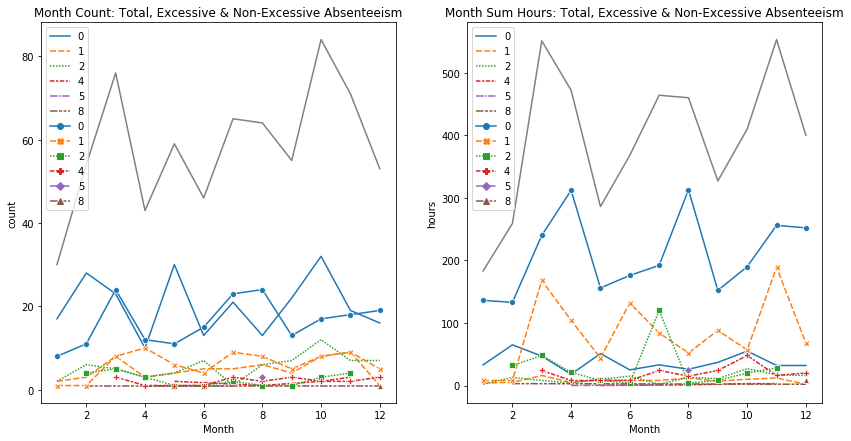

In [32]:
plot('Pets', xdf, 'Absenteeism Time in Hours', 'Target', 'Month', 14, 7)

The graphs show the MONTHLY absences due to "PETS" in terms of COUNT and SUM OF HOURS, respectively. The marked lines show the excessive absences, and the unmarked lines refer to the non-excessive absences. The coloured lines also show the trend based on number of pets from 0 to 8.

Overall, “absenteeism time in hours” and number of pets are negatively correlated. Employees with 0 or no pets have higher rate of absenteeism that decreases where the number of pets increase. On a monthly basis, the rate of absenteeism is high on the months of March and October. Based on the first graph, the number of employees with non-excessive absences is apparently higher than the number of employees with excessive absenteeism. On the 2nd graph, employees with 0 and 1 pet have higher hours of excessive absenteeism.

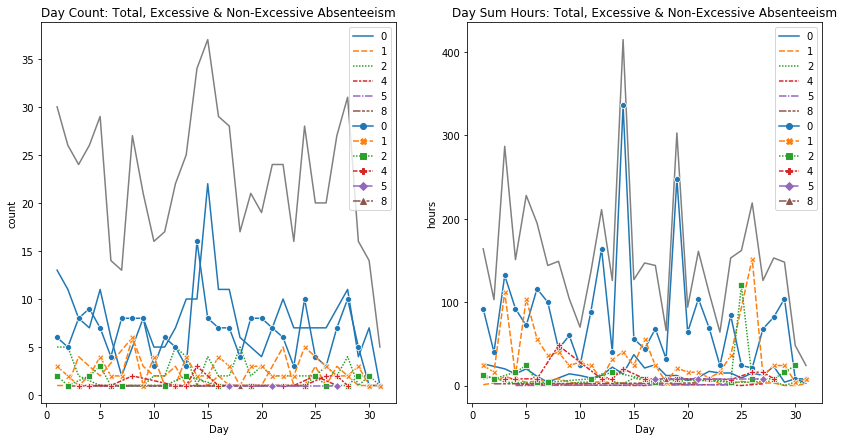

In [33]:
plot('Pets', xdf, 'Absenteeism Time in Hours', 'Target', 'Day', 14, 7)

The graphs show the DAILY absences due to "PETS" in terms of COUNT and SUM OF HOURS, respectively. The marked lines show the excessive absences, and the unmarked lines refer to the non-excessive absences. The coloured lines also show the trend based on number of pets from 0 to 8.

The 1st graph shows that employees with 0 pets have the highest rate of absenteeism where there are more counts of non-excessive absenteeism than there are for excessive absenteeism. In contrast, this top group in graph 1 has one of the lowest accumulated hours of absenteeism, being exceeded by excessive absenteeism by employees with 0 and 1 pet.